In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)
%config InlineBackend.figure_format = 'retina'

from numpy.matlib import repmat
from sklearn.preprocessing import normalize

In [2]:
spotify_dataset = pd.read_csv('genres_v2.csv')

c:\Users\Thanh Bui\AppData\Local\Programs\PythonCodingPack\lib\site-packages\IPython\core\interactiveshell.py:3134: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
spotify_dataset.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [4]:
spotify_dataset.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [5]:
columns_cluster = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

**PCA**
* Using PCA to reduce dimension 

In [6]:
# Scale before PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Getting columns that we want to find cluster
org_cluster = spotify_dataset[columns_cluster]
scaled_cluster = pd.DataFrame(scaler.fit_transform(org_cluster))

In [7]:
# Using np.stack to put into matrix form
A = np.stack(org_cluster.values)
(m, n) = A.shape
print("Cluster matrix shape:", (m, n))

Cluster matrix shape: (42305, 11)


In [8]:
# Calculate the mean by each column
mean = np.mean(org_cluster)
mean_matrix = np.stack(mean.values)
mean_matrix = mean_matrix.reshape((mean.shape[0], 1))

# Print to check
print(mean_matrix)
print("Shape:", mean_matrix.shape)

[[ 6.39364321e-01]
 [ 7.62515591e-01]
 [ 5.37023992e+00]
 [-6.46544210e+00]
 [ 5.49462239e-01]
 [ 1.36560548e-01]
 [ 9.61604757e-02]
 [ 2.83047542e-01]
 [ 2.14079232e-01]
 [ 3.57100957e-01]
 [ 1.47474056e+02]]
Shape: (11, 1)


In [9]:
def eigsort(evector, evals):
    
    # Sort the eigenvalues from largest to smallest
    lambd = np.sort(evals)[::-1]
    index = np.argsort(evals)[::-1]
    
    # Getting sorted eigenvalues matrix
    D_sort = np.diag(lambd)
    
    m = np.size(lambd)
    V_sort = np.zeros((m, m))
    
    # Getting sorted eigenvectors matrix
    for i in range(m):
        V_sort[:,i] = evector[:,index[i]]
        
    # Return sorted (eigenvalues, eigenvectors); be consistent with the np.linalg.eig()
    return D_sort, V_sort

In [10]:
def PCA_largeDim(df, mean):
    # Zero-mean the data
    Z = A - repmat(mean, m, 1)

    # Should have 11 eigenvalues
    # And 11 eigenvectors correspond to those
    evals, evector = np.linalg.eig(Z.T.dot(Z))

    # Sort eigenvectors by eigenvalues descending order
    Dsort, Vsort = eigsort(evector, evals) 

    # Compute Eigenvectors of AA.T then normalize using L2 norm (euclidean distance)
    V = A.dot(Vsort)
    V = normalize(V, norm='l2', axis=0)  #l2 norm == euclidean distance

    # Compute Principal Components
    C = V.T.dot(Z)

    # Reconstruct zero-meaned matrix then the pattern
    X_hat = V.dot(C) + repmat(mean, m, 1)

    # Return sorted eigenvectors, principal components, and reconstructed pattern
    return V, C, X_hat



In [11]:
V, C, X_hat = PCA_largeDim(A, mean)

# Print to check
print("Eigenvector Shape:", V.shape)
print("Principal Component Shape:", C.shape)
print("Reconstructed Pattern Shape:", X_hat.shape)

Eigenvector Shape: (42305, 11)
Principal Component Shape: (11, 11)
Reconstructed Pattern Shape: (42305, 11)


In [12]:
print("Original data points")
org_cluster.head(10)

Original data points


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988
5,0.721,0.568,0,-11.295,1,0.4140,0.0452,0.212000,0.1280,0.1090,144.915
6,0.718,0.668,8,-4.162,1,0.1370,0.0254,0.007800,0.1240,0.0380,130.826
7,0.694,0.711,8,-5.525,1,0.2210,0.0397,0.000000,0.1120,0.2830,138.049
8,0.774,0.751,1,-2.445,1,0.1980,0.0614,0.000000,0.0728,0.1890,219.960
9,0.893,0.907,11,-10.406,1,0.3670,0.1520,0.031100,0.5580,0.3020,199.942


In [13]:
print("New data points")
new_cluster_PCA = pd.DataFrame(X_hat)
new_cluster_PCA.columns = columns_cluster
new_cluster_PCA.head(10)

New data points


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.748739,0.794862,6.047091,-7.338480,0.835079,0.218386,-0.041101,0.378645,0.225834,0.369527,151.497781
1,0.725268,0.739834,7.789195,-7.285531,0.827079,0.182660,0.078434,0.366408,0.252772,0.362604,150.428991
2,0.779333,0.780010,6.950131,-7.184153,0.834904,0.183631,-0.065755,0.456174,0.282929,0.311671,153.057276
3,0.676505,0.819758,5.467183,-7.129465,0.837264,0.156935,-0.030012,0.414437,0.219360,0.351796,152.259615
4,0.735713,0.769338,6.043721,-7.354312,0.835248,0.201607,0.025942,0.362899,0.250007,0.400798,151.268052
5,0.749165,0.780913,5.463061,-7.677590,0.833186,0.215091,-0.041118,0.415955,0.241697,0.330535,151.193348
6,0.754580,0.772964,7.789375,-7.026011,0.828125,0.187783,-0.025880,0.387394,0.242776,0.332828,150.827850
7,0.730513,0.790325,7.796013,-7.160519,0.829730,0.189980,-0.022497,0.375210,0.232438,0.367291,151.014147
8,0.768137,0.778112,5.770993,-6.963851,0.839028,0.189065,-0.034320,0.443894,0.240266,0.326664,153.101271
9,0.771526,0.780642,8.716986,-7.689478,0.830436,0.225093,-0.033084,0.429872,0.312705,0.356143,152.604021


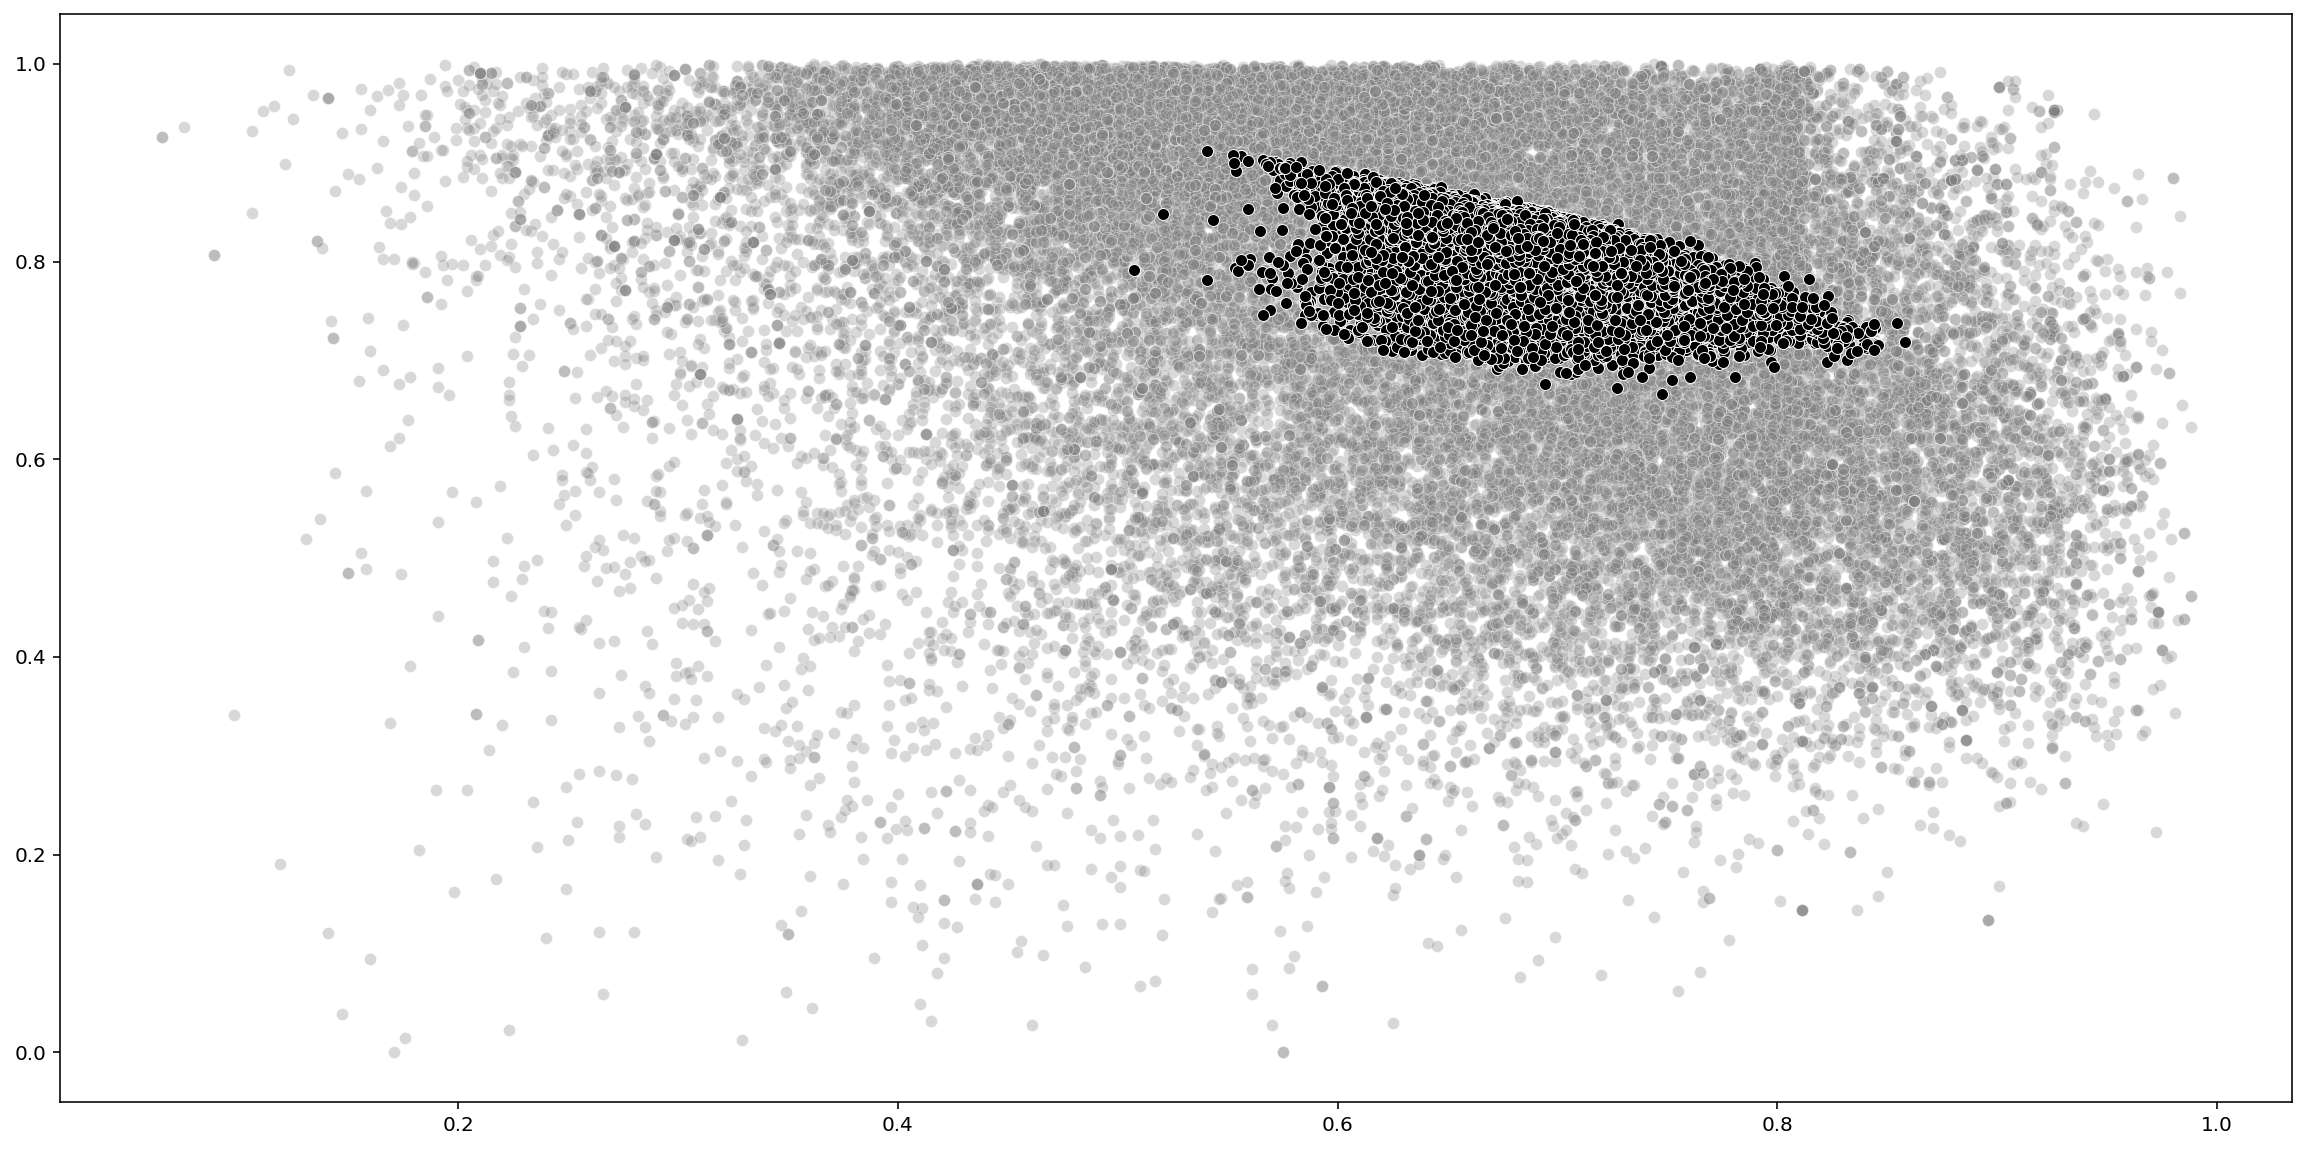

In [14]:
# Testing
ax = sns.scatterplot(x=A[:,0], y=A[:,1], color='grey', alpha=0.3) # Original data points
ax = sns.scatterplot(x=X_hat[:,0], y=X_hat[:,1], color='black')   # New data points

Correlation Heatmap with Original Data


<AxesSubplot:>

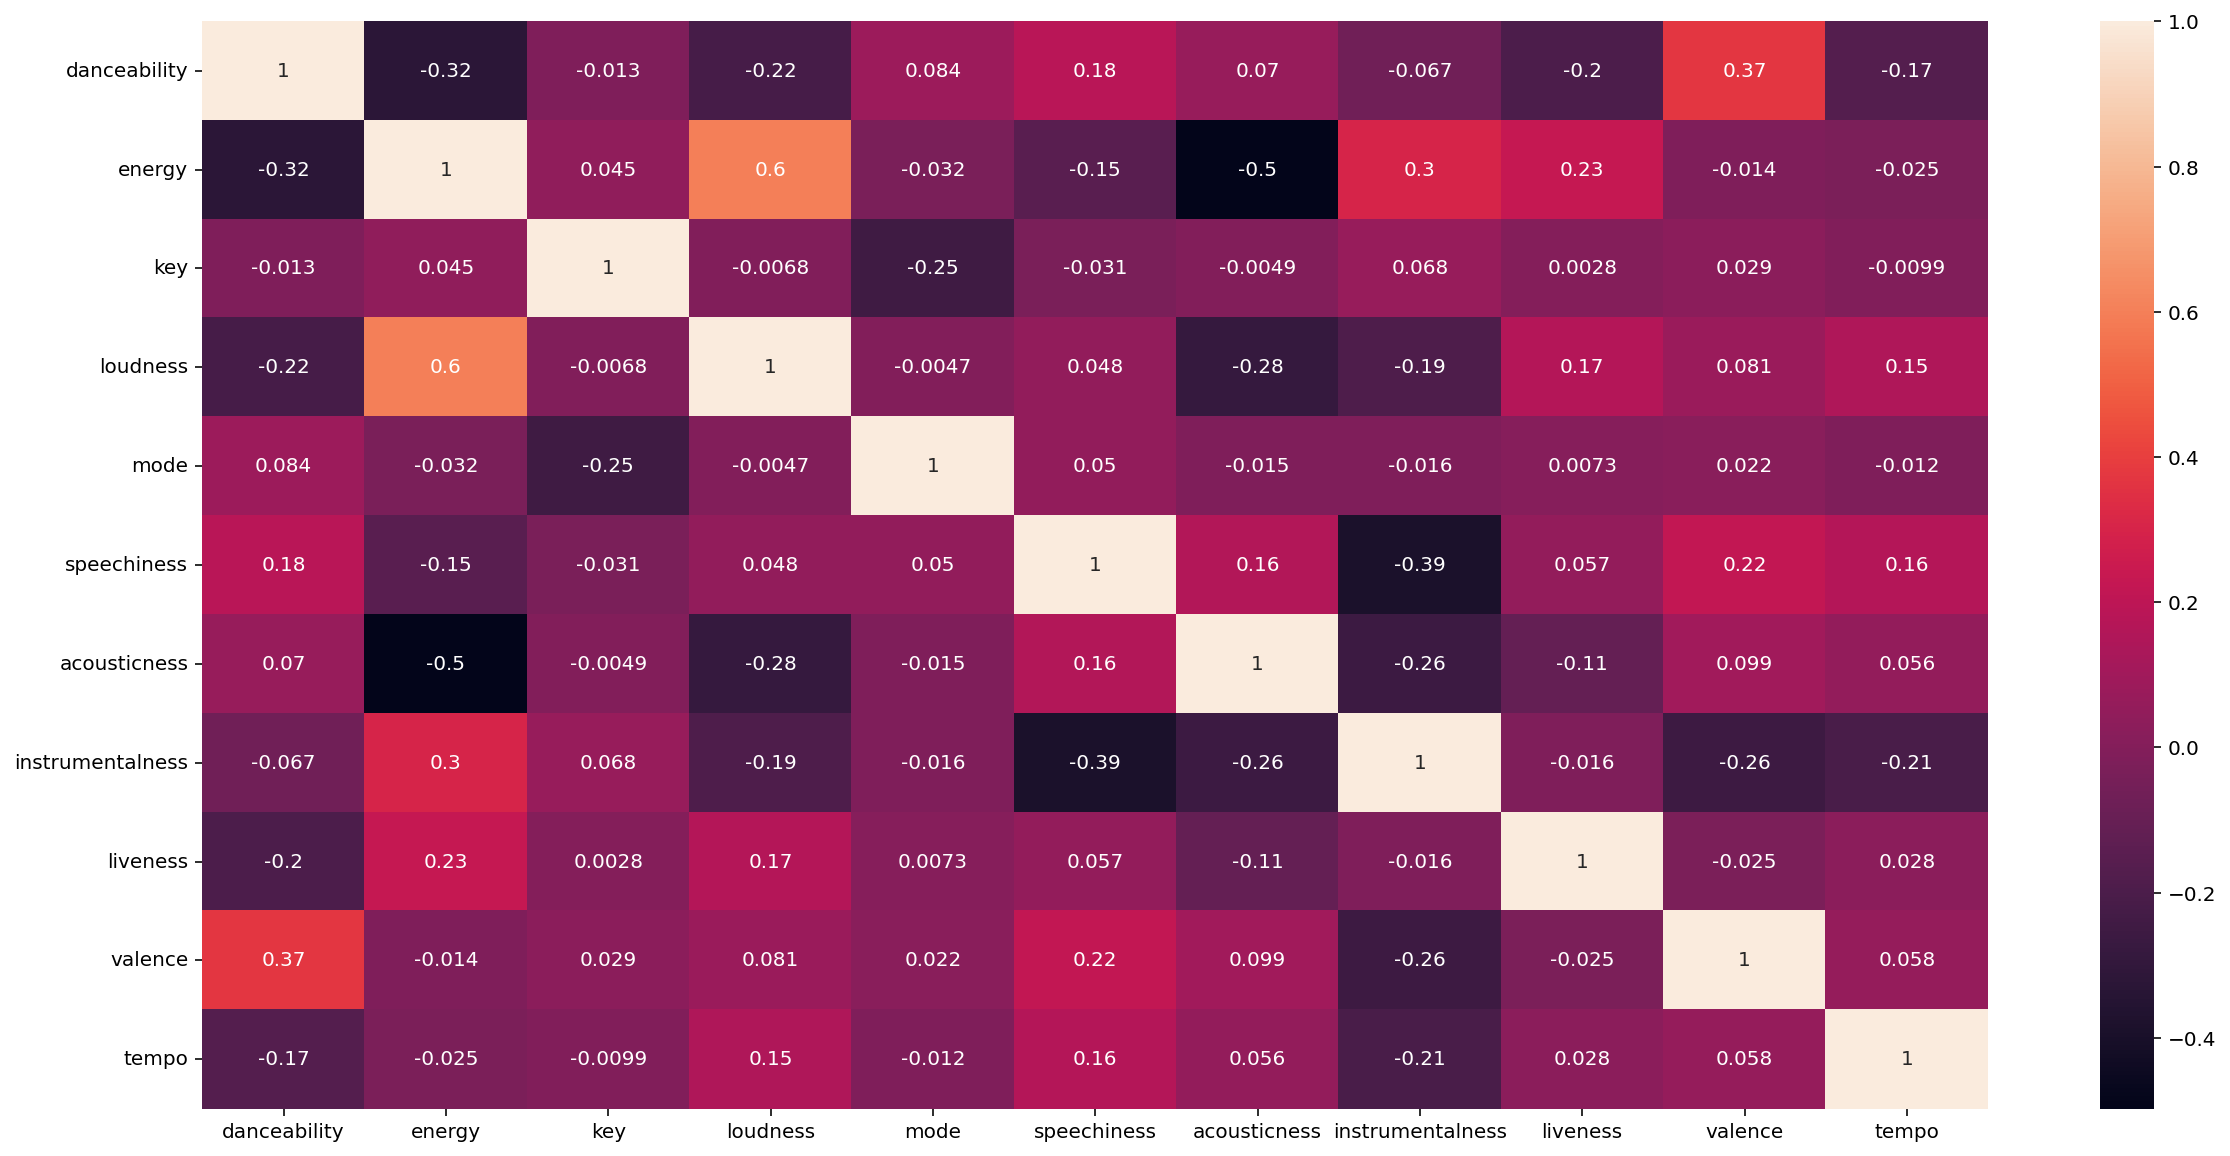

In [15]:
print("Correlation Heatmap with Original Data")
sns.heatmap(org_cluster.corr(), annot=True)

Correlation HeatMap after PCA


<AxesSubplot:>

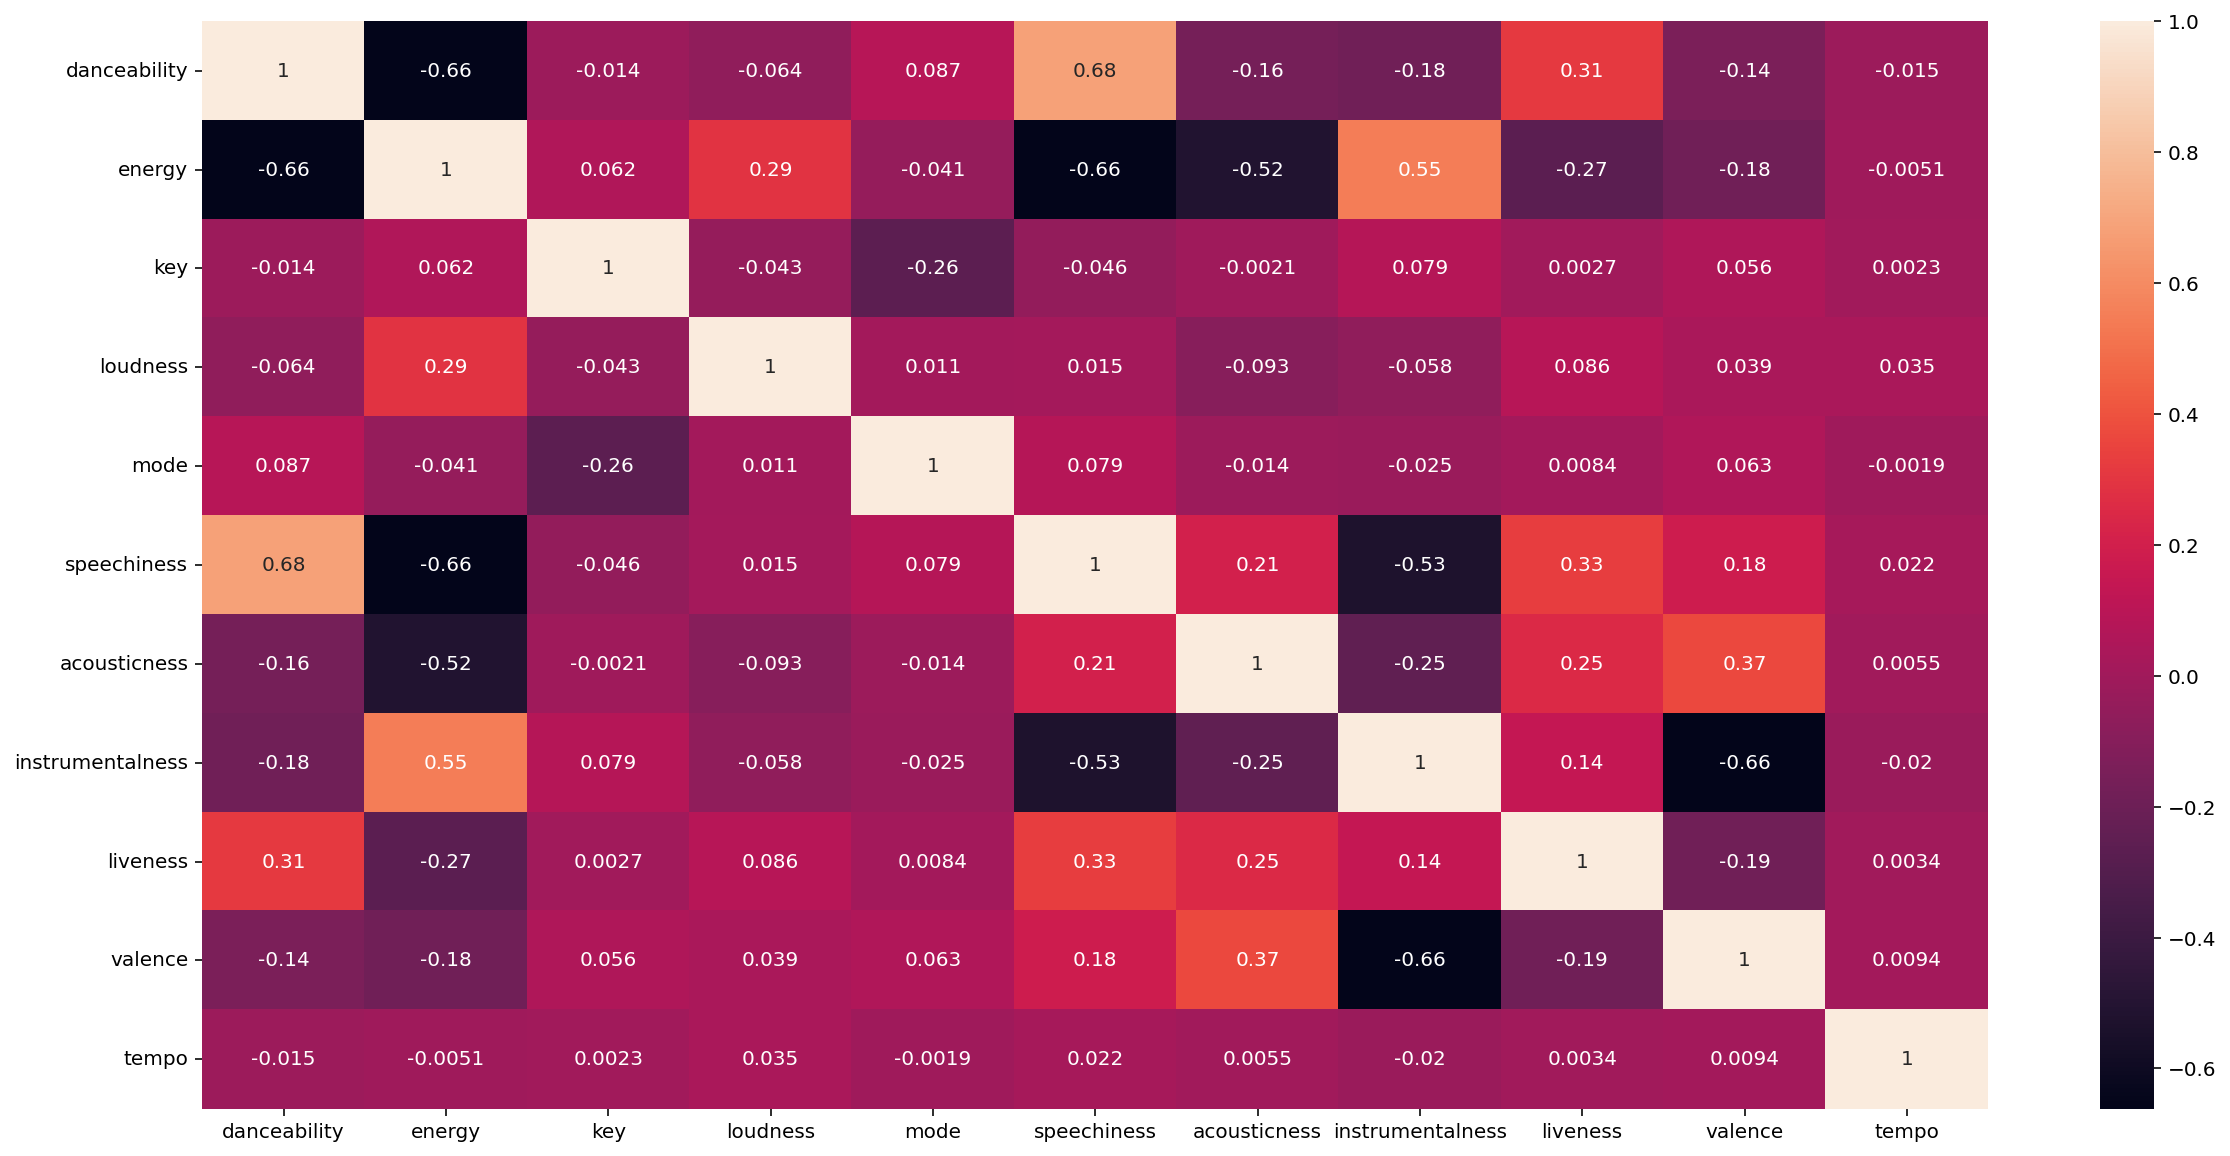

In [16]:
print("Correlation HeatMap after PCA")
sns.heatmap(new_cluster_PCA.corr(), annot=True)

Looking at Histogram of the Original Data


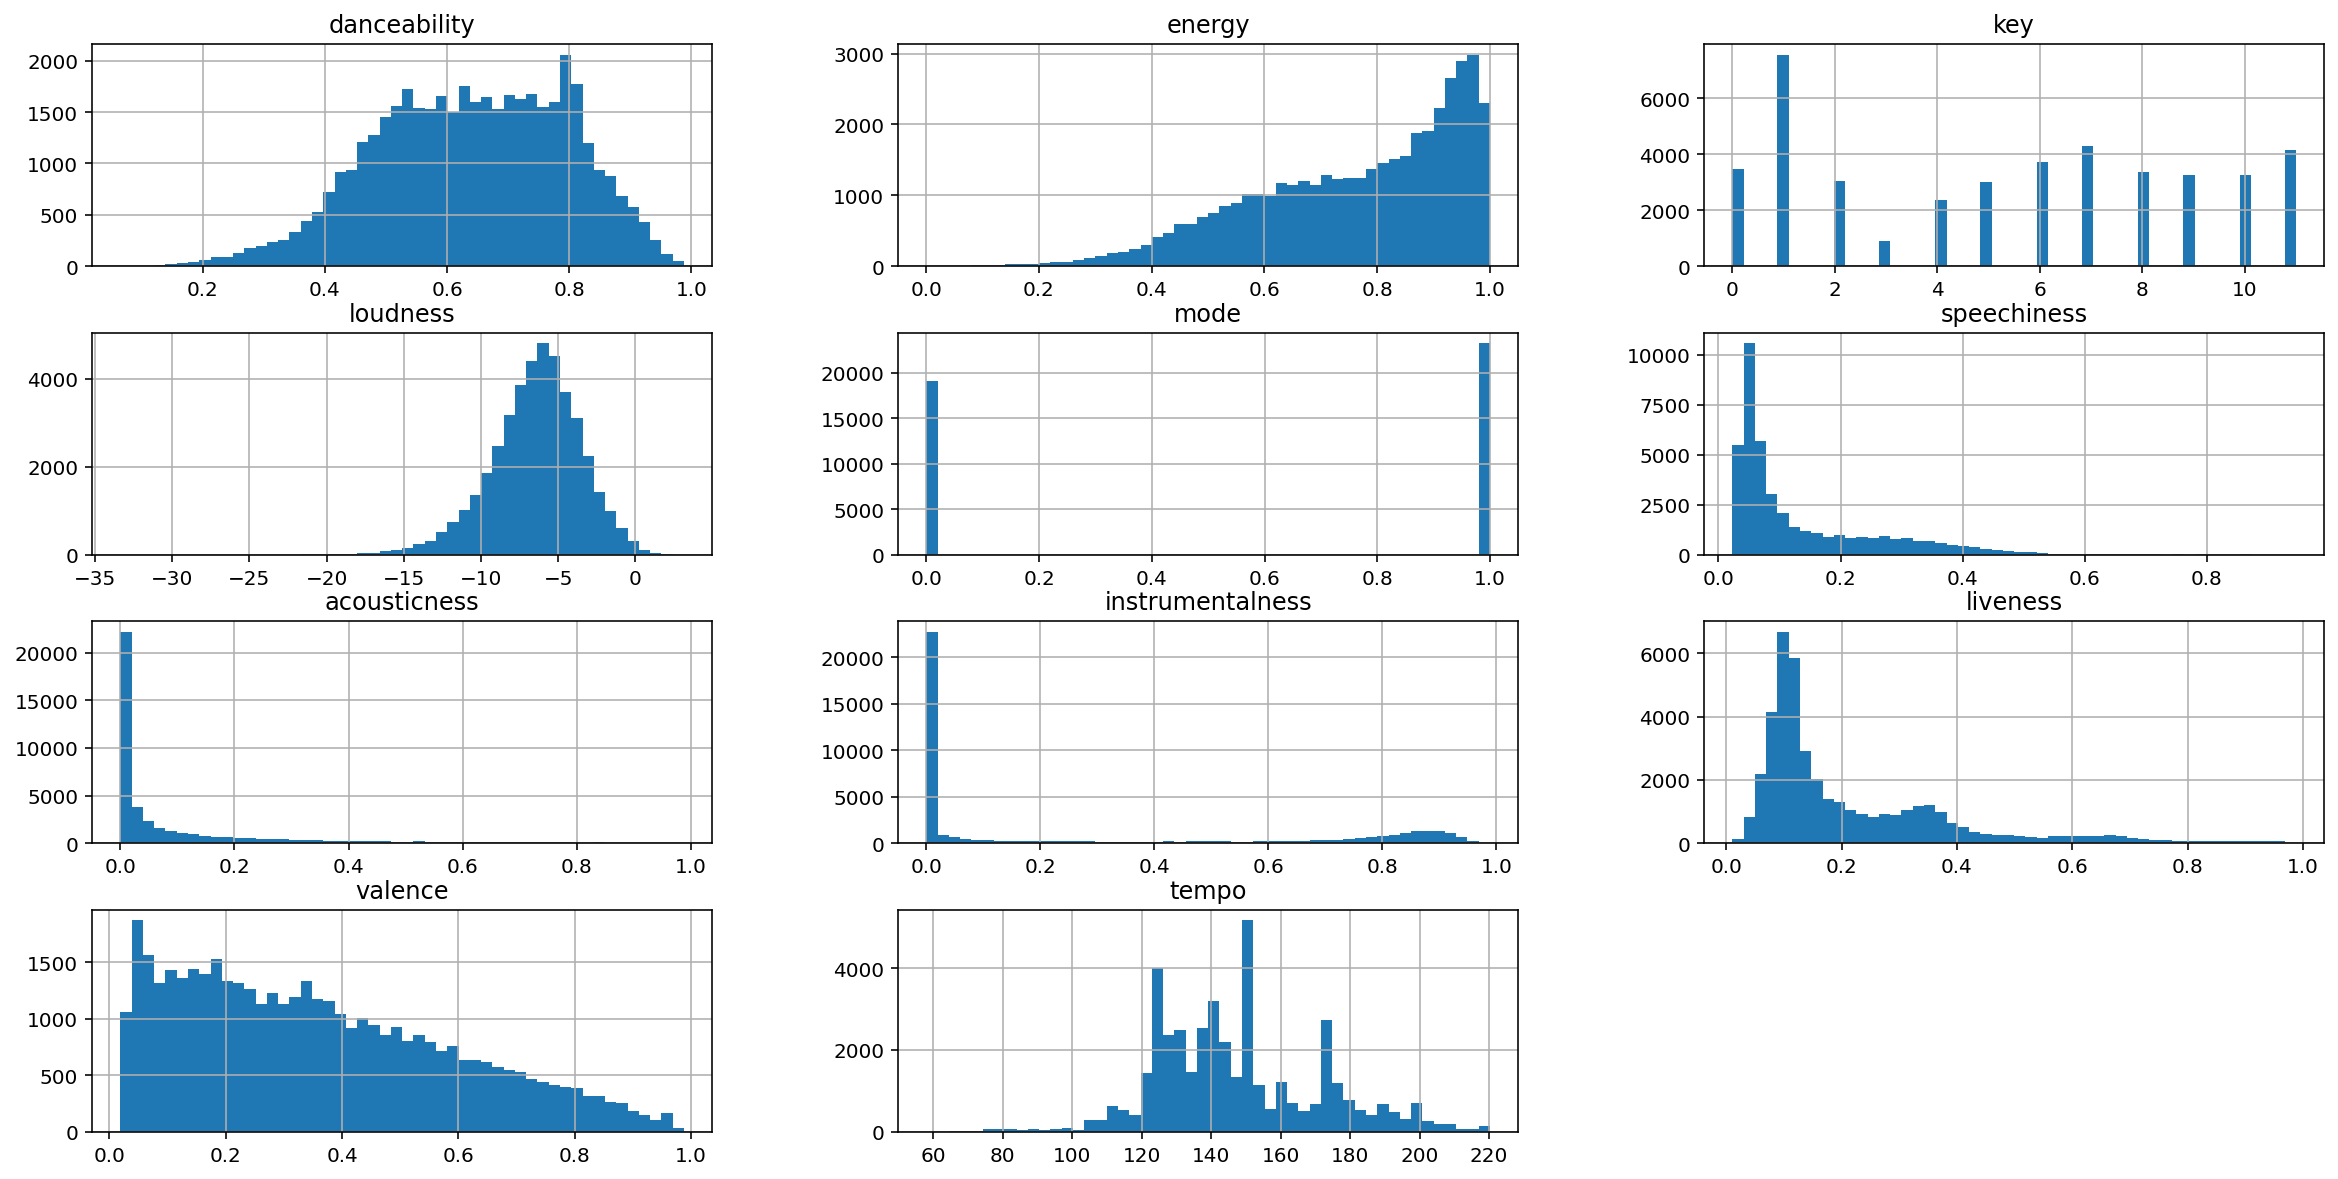

In [17]:
print("Looking at Histogram of the Original Data")
org_cluster.hist(bins=50, figsize=(20,10))
plt.show()

Looking at Histogram after running PCA


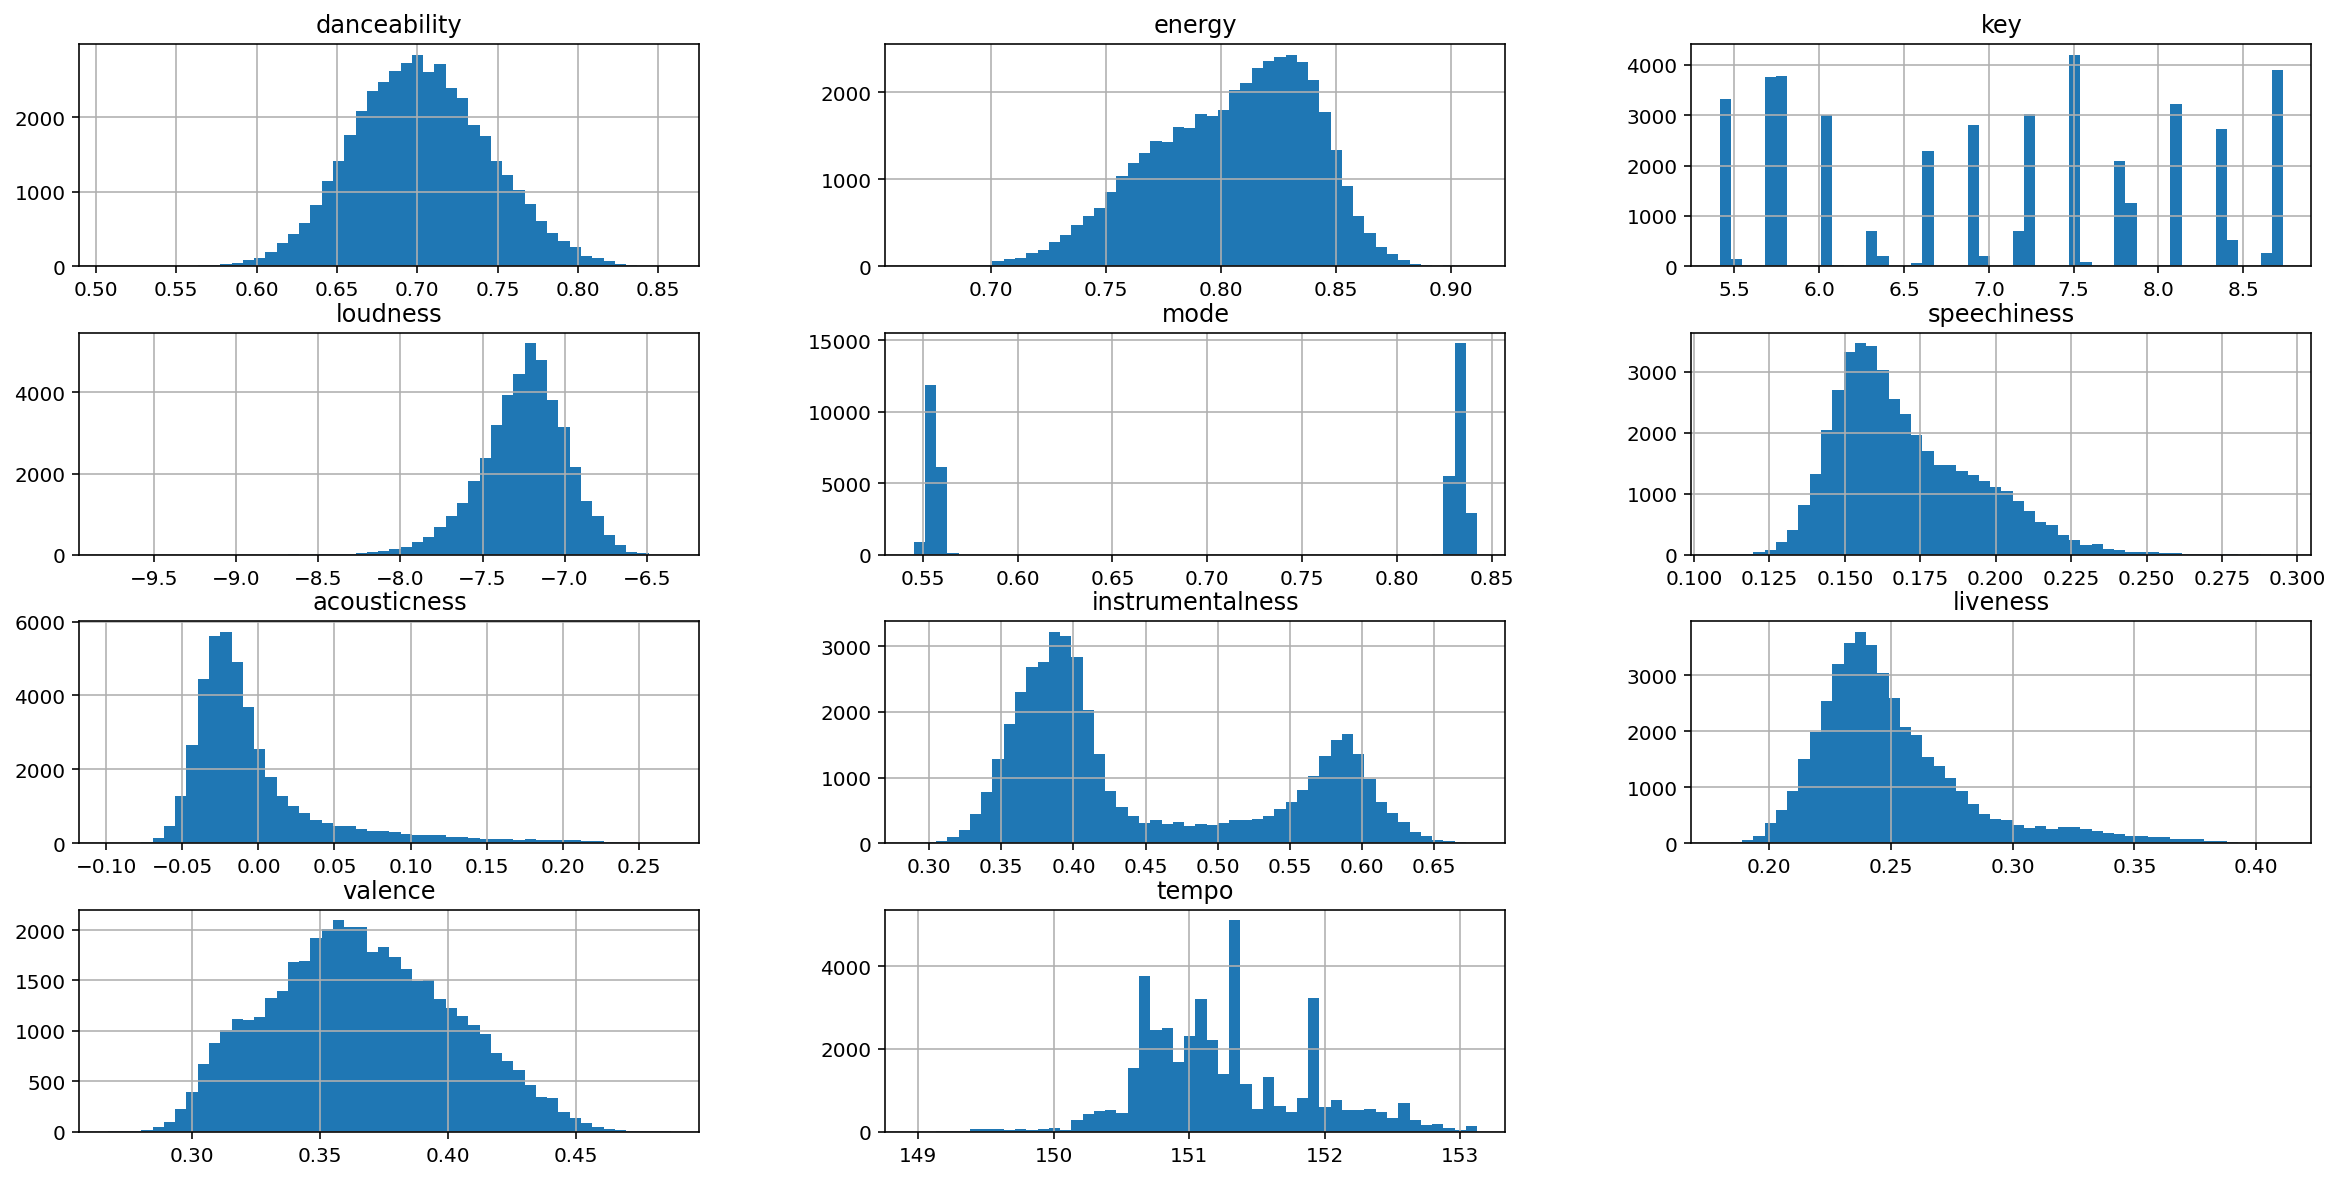

In [18]:
print("Looking at Histogram after running PCA")
new_cluster_PCA.hist(bins=50, figsize=(20,10))
plt.show()

## KMean #1

### Using Original Scaled Dataset

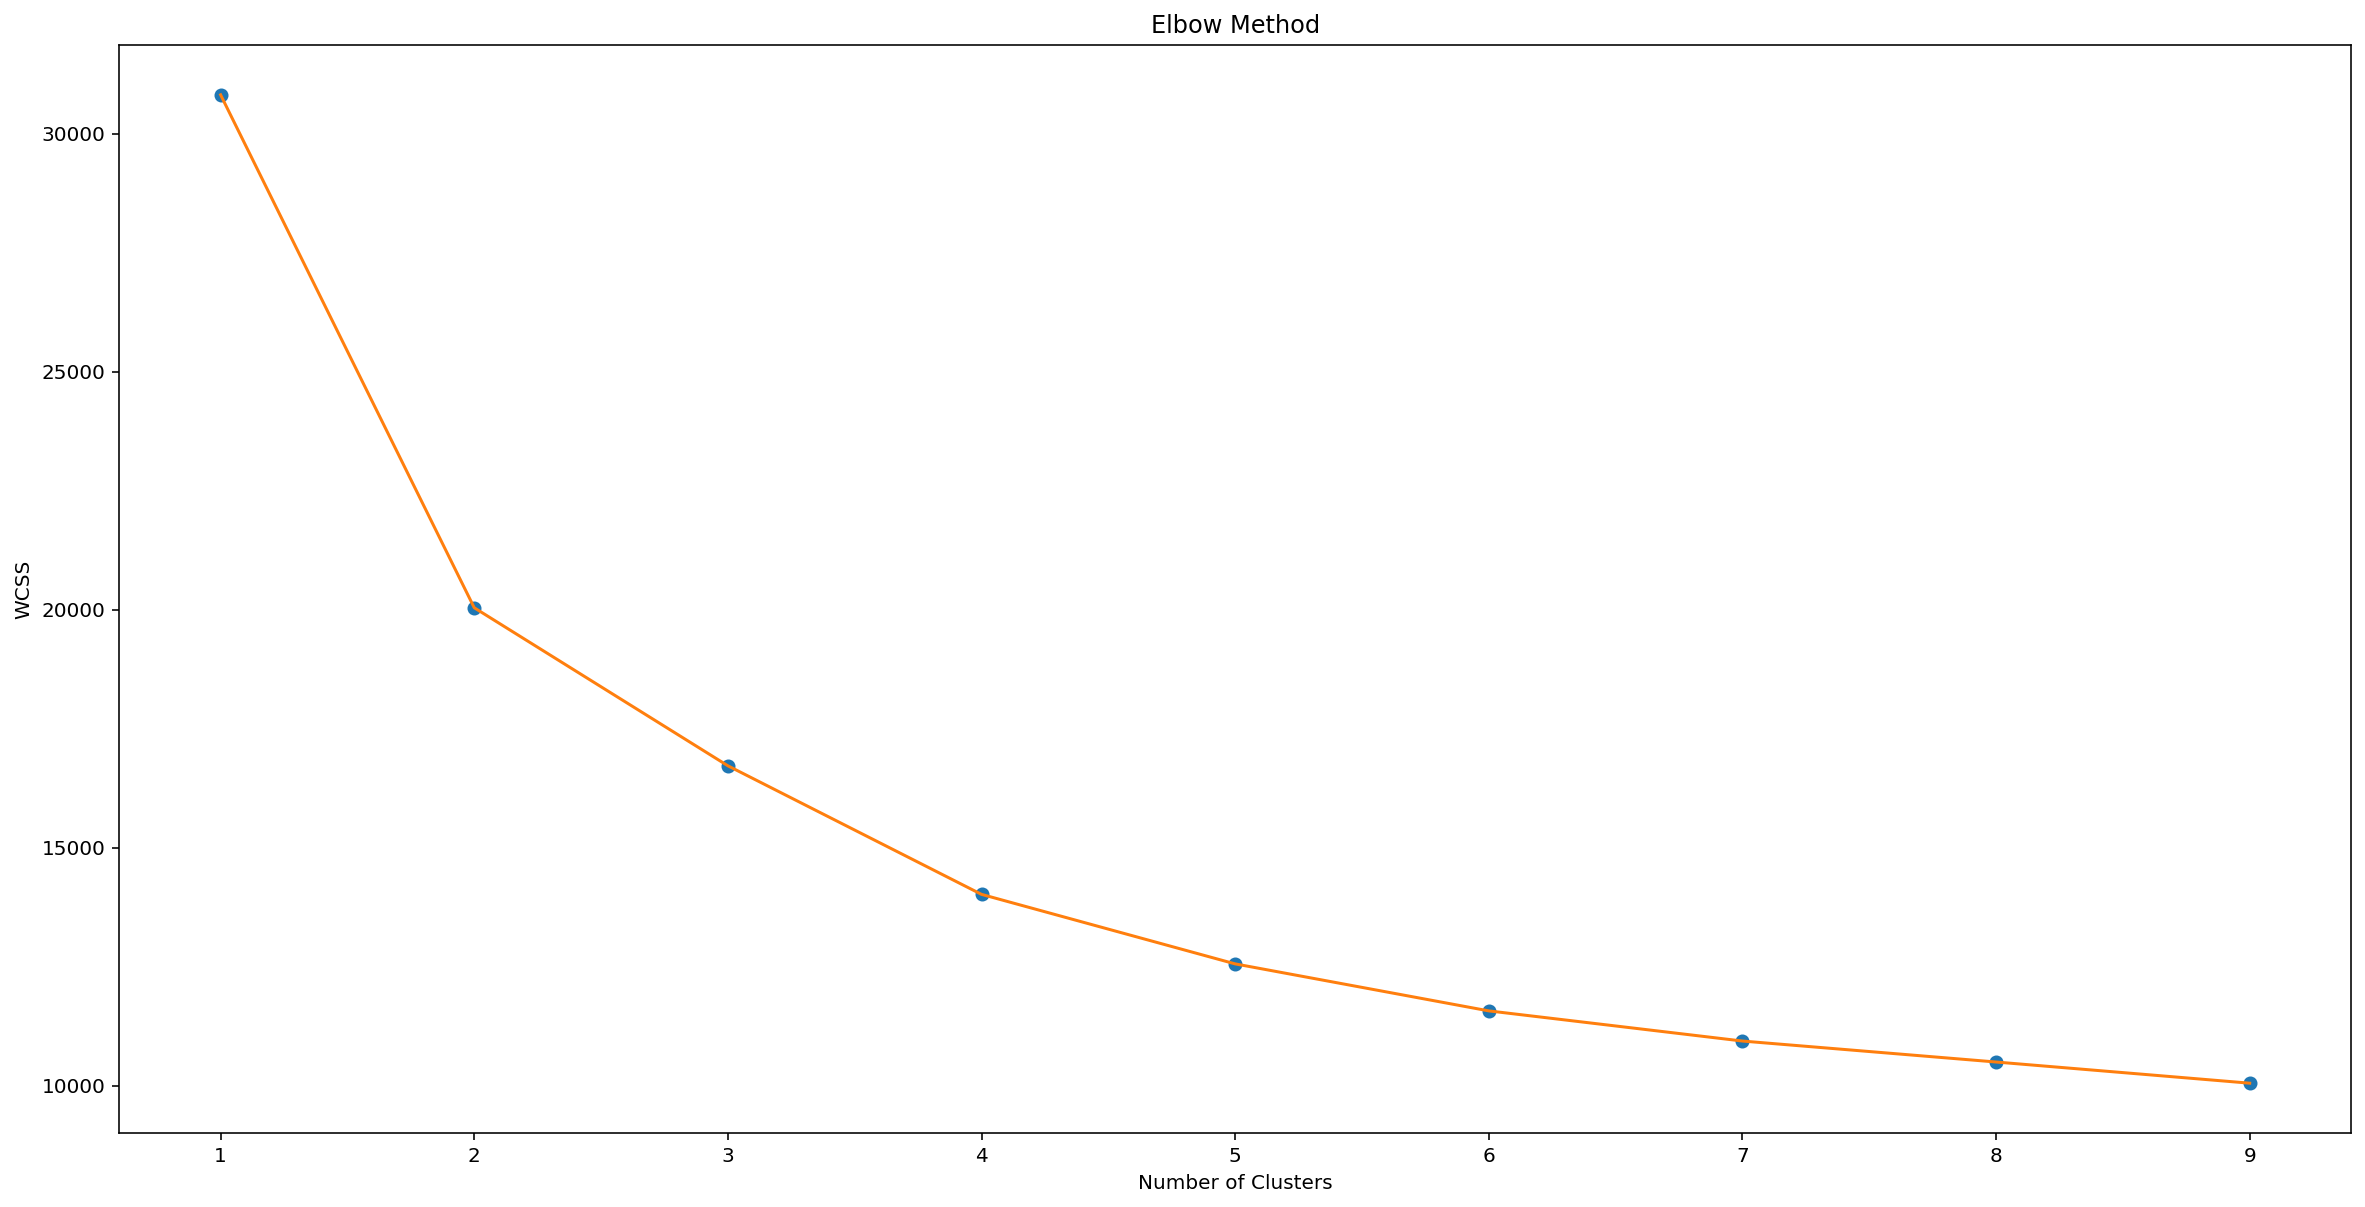

In [19]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(scaled_cluster)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss, 'o')
plt.plot(range(1, 10), wcss, '-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From looking at the WCSS graph, we can see that with 5-6 clusters, we will have a better result. 

In [20]:
# Let's have 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(scaled_cluster)

In [21]:
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_clusters']
kmeans.head()

,k_clusters
0,0
1,1
2,1
3,0
4,0


In [22]:
org_df = spotify_dataset
org_df = pd.concat([org_df, kmeans], axis=1)
org_df = org_df.drop(columns=['title', 'Unnamed: 0'])

In [23]:
org_cluster = pd.concat([org_cluster, kmeans], axis=1)
org_cluster.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,k_clusters
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,0
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,1
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,1
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,0


In [24]:
org_cluster.groupby('k_clusters').describe()

danceability                                                    \
                  count      mean       std     min    25%    50%     75%   
k_clusters                                                                  
0                8356.0  0.665628  0.158767  0.1360  0.547  0.682  0.7930   
1                7534.0  0.651897  0.164402  0.1380  0.532  0.665  0.7830   
2                7355.0  0.634523  0.138168  0.0753  0.541  0.640  0.7470   
3                6529.0  0.611189  0.142867  0.1060  0.510  0.611  0.7280   
4               12531.0  0.631838  0.163955  0.0651  0.511  0.636  0.7645   

                    energy            ... valence           tempo              \
              max    count      mean  ...     75%    max    count        mean   
k_clusters                            ...                                       
0           0.985   8356.0  0.715552  ...   0.558  0.980   8356.0  150.252170   
1           0.988   7534.0  0.720915  ...   0.578  0.980   7534.0  150.982615   
2           0.978   7355.0  0.841543  ...   0.397  0.980   7355.0  139.892026   
3           0.959   6529.0  0.837073  ...   0.395  0.988   6529.0  142.094722   
4           0.988  12531.0  0.733612  ...   0.559  0.979  12531.0  150.765102   

                                                                        
                  std      min        25%       50%       75%      max  
k_clusters                                                              
0           26.101351   61.309  130.13425  149.9225  169.8675  220.232  
1           26.263950   57.967  130.82600  149.9520  170.2055  220.138  
2           16.550631  106.011  127.01500  137.9600  145.9770  220.152  
3           18.394251   77.594  128.00200  138.0010  149.9280  220.052  
4           25.325361   64.331  131.98300  149.9850  170.0300  220.290  

[5 rows x 88 columns]

## KMean #2

### Using PCA Scaled Dataset

In [25]:
# Let's have 5 clusters
kmeans_PCA = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans_PCA = kmeans_PCA.fit_predict(new_cluster_PCA)

In [26]:
kmeans_PCA = pd.DataFrame(data=y_kmeans_PCA, dtype=int)
kmeans_PCA.columns = ['k_clusters']
kmeans_PCA.head()

,k_clusters
0,1
1,2
2,3
3,1
4,4


In [27]:
df_2 = spotify_dataset
df_2 = pd.concat([df_2, kmeans_PCA], axis=1)
df_2 = df_2.drop(columns=['title', 'Unnamed: 0'])

In [28]:
new_cluster_PCA = pd.concat([new_cluster_PCA, kmeans_PCA], axis=1)
new_cluster_PCA.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,k_clusters
0,0.748739,0.794862,6.047091,-7.338480,0.835079,0.218386,-0.041101,0.378645,0.225834,0.369527,151.497781,1
1,0.725268,0.739834,7.789195,-7.285531,0.827079,0.182660,0.078434,0.366408,0.252772,0.362604,150.428991,2
2,0.779333,0.780010,6.950131,-7.184153,0.834904,0.183631,-0.065755,0.456174,0.282929,0.311671,153.057276,3
3,0.676505,0.819758,5.467183,-7.129465,0.837264,0.156935,-0.030012,0.414437,0.219360,0.351796,152.259615,1
4,0.735713,0.769338,6.043721,-7.354312,0.835248,0.201607,0.025942,0.362899,0.250007,0.400798,151.268052,4


In [29]:
new_cluster_PCA.groupby('k_clusters').describe()

danceability                                                    \
                  count      mean       std       min       25%       50%   
k_clusters                                                                  
0               10584.0  0.696942  0.038978  0.540457  0.670212  0.695669   
1                4986.0  0.706081  0.045124  0.507276  0.674229  0.705993   
2               10226.0  0.703117  0.040671  0.554741  0.674488  0.702116   
3                5925.0  0.705097  0.043785  0.520430  0.674588  0.704473   
4               10584.0  0.704364  0.042573  0.540360  0.674019  0.702695   

                                 energy            ...   valence            \
                 75%       max    count      mean  ...       75%       max   
k_clusters                                         ...                       
0           0.722501  0.858033  10584.0  0.810784  ...  0.386260  0.487117   
1           0.738159  0.831958   4986.0  0.797689  ...  0.393969  0.473900   
2           0.730333  0.854585  10226.0  0.807047  ...  0.393801  0.483656   
3           0.736116  0.845798   5925.0  0.800131  ...  0.400243  0.475255   
4           0.732451  0.845468  10584.0  0.802880  ...  0.385516  0.480386   

              tempo                                                            \
              count        mean       std         min         25%         50%   
k_clusters                                                                      
0           10584.0  151.016332  0.388516  149.142623  150.739999  151.015149   
1            4986.0  152.060333  0.364681  151.427354  151.828523  151.951715   
2           10226.0  150.956090  0.355056  148.967700  150.709338  151.013827   
3            5925.0  152.100693  0.345269  151.427250  151.902890  151.965922   
4           10584.0  150.930523  0.354747  149.047792  150.701820  150.987637   

                                    
                   75%         max  
k_clusters                          
0           151.313817  151.979866  
1           152.321291  153.121258  
2           151.268499  151.717611  
3           152.340885  153.125119  
4           151.222888  151.542044  

[5 rows x 88 columns]

In [32]:
# checking the songs in the cluster
df_2.loc[df_2['k_clusters'] == 0][:10]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,k_clusters
14,0.765,0.726,5,-5.580,1,0.1910,0.00770,0.000000,0.619,0.270,...,audio_features,4SKqOHKYU5pgHr5UiVKiQN,spotify:track:4SKqOHKYU5pgHr5UiVKiQN,https://api.spotify.com/v1/tracks/4SKqOHKYU5pg...,https://api.spotify.com/v1/audio-analysis/4SKq...,135079,4,Dark Trap,Backpack,0
15,0.617,0.541,6,-4.113,1,0.7800,0.12500,0.000000,0.369,0.430,...,audio_features,4Ag89Y7qSUrpxcgRtSzSam,spotify:track:4Ag89Y7qSUrpxcgRtSzSam,https://api.spotify.com/v1/tracks/4Ag89Y7qSUrp...,https://api.spotify.com/v1/audio-analysis/4Ag8...,107999,4,Dark Trap,D(R)Own,0
21,0.876,0.768,7,-6.606,1,0.2010,0.11200,0.000012,0.283,0.720,...,audio_features,09320vyX4qHd4GjHIpy5w0,spotify:track:09320vyX4qHd4GjHIpy5w0,https://api.spotify.com/v1/tracks/09320vyX4qHd...,https://api.spotify.com/v1/audio-analysis/0932...,124676,5,Dark Trap,High 'N Mighty,0
26,0.705,0.648,4,-10.467,0,0.1410,0.00476,0.000595,0.373,0.398,...,audio_features,0vUhboOWxdj97denl4T91p,spotify:track:0vUhboOWxdj97denl4T91p,https://api.spotify.com/v1/tracks/0vUhboOWxdj9...,https://api.spotify.com/v1/audio-analysis/0vUh...,155350,4,Dark Trap,No Teeth,0
33,0.455,0.525,5,-12.692,0,0.0455,0.13600,0.734000,0.125,0.279,...,audio_features,2Tu4kHEeIVFn6Re2ybm2lQ,spotify:track:2Tu4kHEeIVFn6Re2ybm2lQ,https://api.spotify.com/v1/tracks/2Tu4kHEeIVFn...,https://api.spotify.com/v1/audio-analysis/2Tu4...,159974,4,Dark Trap,OhNo!,0
35,0.745,0.688,6,-9.263,0,0.1030,0.26400,0.009060,0.077,0.522,...,audio_features,78w3kPqUAwDjADBY3xAGHl,spotify:track:78w3kPqUAwDjADBY3xAGHl,https://api.spotify.com/v1/tracks/78w3kPqUAwDj...,https://api.spotify.com/v1/audio-analysis/78w3...,107750,5,Dark Trap,OakGroveRoad,0
50,0.783,0.684,5,-7.435,1,0.0358,0.00873,0.000548,0.222,0.173,...,audio_features,78SOPBLZeBjDQ9NVTePOPE,spotify:track:78SOPBLZeBjDQ9NVTePOPE,https://api.spotify.com/v1/tracks/78SOPBLZeBjD...,https://api.spotify.com/v1/audio-analysis/78SO...,117447,4,Dark Trap,Mutiny,0
75,0.678,0.770,6,-3.206,0,0.1450,0.12500,0.000000,0.184,0.284,...,audio_features,3cQPyVlnrmmWU5fQJxl0q9,spotify:track:3cQPyVlnrmmWU5fQJxl0q9,https://api.spotify.com/v1/tracks/3cQPyVlnrmmW...,https://api.spotify.com/v1/audio-analysis/3cQP...,133903,4,Dark Trap,You're Now Tuning Into 66.6 FM With DJ Rapture...,0
77,0.810,0.524,5,-6.705,1,0.0441,0.04440,0.714000,0.105,0.155,...,audio_features,7EnGzsqQi0bAVGQw8i4WIQ,spotify:track:7EnGzsqQi0bAVGQw8i4WIQ,https://api.spotify.com/v1/tracks/7EnGzsqQi0bA...,https://api.spotify.com/v1/audio-analysis/7EnG...,118236,4,Dark Trap,A Death In The Ocean Would Be Beautiful,0
80,0.909,0.573,5,-6.856,1,0.1810,0.03320,0.016300,0.657,0.392,...,audio_features,7tUXZgLbOCvRJ9FBlairoU,spotify:track:7tUXZgLbOCvRJ9FBlairoU,https://api.spotify.com/v1/tracks/7tUXZgLbOCvR...,https://api.spotify.com/v1/audio-analysis/7tUX...,134271,4,Dark Trap,Venom,0


In [33]:
# checking the songs in the cluster
df_2.loc[df_2['k_clusters'] == 1][:10]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,k_clusters
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,...,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,1
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,...,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),1
8,0.774,0.751,1,-2.445,1,0.1980,0.06140,0.000000,0.0728,0.1890,...,audio_features,37gqBnUAZe8BY8WR56kDNk,spotify:track:37gqBnUAZe8BY8WR56kDNk,https://api.spotify.com/v1/tracks/37gqBnUAZe8B...,https://api.spotify.com/v1/audio-analysis/37gq...,140326,4,Dark Trap,I Put My Dick in Your Mental,1
16,0.755,0.298,1,-15.032,1,0.0915,0.15400,0.329000,0.1010,0.0372,...,audio_features,28xkYPSP0P5xu5vT6MQfCy,spotify:track:28xkYPSP0P5xu5vT6MQfCy,https://api.spotify.com/v1/tracks/28xkYPSP0P5x...,https://api.spotify.com/v1/audio-analysis/28xk...,123054,4,Dark Trap,"Okay,ButThisIsTheLastTime",1
36,0.722,0.519,0,-12.871,1,0.0516,0.02530,0.011400,0.1890,0.1280,...,audio_features,02803el8p3mKqcJzJ3Agpp,spotify:track:02803el8p3mKqcJzJ3Agpp,https://api.spotify.com/v1/tracks/02803el8p3mK...,https://api.spotify.com/v1/audio-analysis/0280...,143833,4,Dark Trap,WhatWasThat,1
42,0.563,0.680,0,-5.953,1,0.3900,0.23600,0.000033,0.1220,0.0396,...,audio_features,6dm3aVYUAfZtdFeLAG6R9F,spotify:track:6dm3aVYUAfZtdFeLAG6R9F,https://api.spotify.com/v1/tracks/6dm3aVYUAfZt...,https://api.spotify.com/v1/audio-analysis/6dm3...,110000,3,Dark Trap,Eternal Dreams,1
46,0.468,0.325,1,-8.267,1,0.2450,0.11500,0.726000,0.1090,0.0387,...,audio_features,2Iwf4sAnEgkuxxnJ61du8z,spotify:track:2Iwf4sAnEgkuxxnJ61du8z,https://api.spotify.com/v1/tracks/2Iwf4sAnEgku...,https://api.spotify.com/v1/audio-analysis/2Iwf...,90645,3,Dark Trap,Claustrophobia,1
47,0.512,0.440,1,-7.816,1,0.2330,0.00386,0.000003,0.2330,0.1320,...,audio_features,04MKRNwoX7TqQkA0ZrtMbC,spotify:track:04MKRNwoX7TqQkA0ZrtMbC,https://api.spotify.com/v1/tracks/04MKRNwoX7Tq...,https://api.spotify.com/v1/audio-analysis/04MK...,86805,1,Dark Trap,Rearranged,1
48,0.504,0.480,3,-8.885,1,0.0450,0.83200,0.000252,0.1010,0.8780,...,audio_features,5DV8yoddFyjLVfRT6pfAht,spotify:track:5DV8yoddFyjLVfRT6pfAht,https://api.spotify.com/v1/tracks/5DV8yoddFyjL...,https://api.spotify.com/v1/audio-analysis/5DV8...,176901,4,Dark Trap,Paralax,1
60,0.262,0.897,4,-2.712,0,0.3980,0.02370,0.000000,0.1100,0.2530,...,audio_features,2x7mBK5ozd9hwneRKMVpkD,spotify:track:2x7mBK5ozd9hwneRKMVpkD,https://api.spotify.com/v1/tracks/2x7mBK5ozd9h...,https://api.spotify.com/v1/audio-analysis/2x7m...,153104,4,Dark Trap,Finger Trembling,1
